# Synaptic transmission

Download the Jupyter notebook: [SynapticTransmission.ipynb](https://raw.githubusercontent.com/ANNarchy/tutorial/master/src/notebooks/SynapticTransmission.ipynb){target="_blank"} or run it directly on [colab.](https://colab.research.google.com/github/ANNarchy/tutorial/blob/master/src/notebooks/SynapticTransmission.ipynb){target="_blank"}

This notebook simply demonstrates the three main type of synaptic transmission for spiking neurons:

1. Instantaneous
2. Exponentially-decreasing
3. Alpha-shaped 

In [1]:
#!pip install ANNarchy

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from ANNarchy import *
clear()

We use here a simple LIF neuron receving three types of projections (a, b, c). The conductance `g_a` uses instantaneous transmission, as it is reset to 0 after each step. `g_b` decreases exponentially with time following a first order ODE. `g_c` is integrated twice in `alpha_c`, leading to the alpha shape.

All methods use the exponential numerical method, as they are first order linear ODEs and can be solved exactly.

In [23]:
LIF = Neuron(
    parameters="""
        tau = 20.
        E_L = -70.
        v_T = 0.
        v_r = -58.
        tau_b = 10.0
        tau_c = 10.0
    """,
    equations="""
        # Membrane potential
        tau * dv/dt = (E_L - v) + g_a + g_b + alpha_c : init=-70.
        
        # Exponentially decreasing
        tau_b * dg_b/dt = -g_b : exponential
        
        # Alpha-shaped
        tau_c * dg_c/dt = -g_c : exponential
        tau_c * dalpha_c/dt = exp((tau_c - dt/2.0)/tau_c) * g_c - alpha_c  : exponential
    """,
    spike="v >= v_T",
    reset="v = v_r",
    refractory = 2.0
)

The LIF neuron will receive a single spike at $t = 10$ ms, using the `SpikeSourceArray` specific population.

In [24]:
inp = SpikeSourceArray([10.])
pop = Population(1, LIF)

We implement three different projections between the same neurons, to highlight the three possible transmission mechanisms.

In [25]:
proj = Projection(inp, pop, 'a').connect_all_to_all(weights=1.0)
proj = Projection(inp, pop, 'b').connect_all_to_all(weights=1.0)
proj = Projection(inp, pop, 'c').connect_all_to_all(weights=1.0)

In [26]:
compile()

We monitor the three conductances:

In [27]:
m = Monitor(pop, ['g_a', 'g_b', 'alpha_c'])

In [28]:
inp.clear()
simulate(100.)

In [29]:
data = m.get()

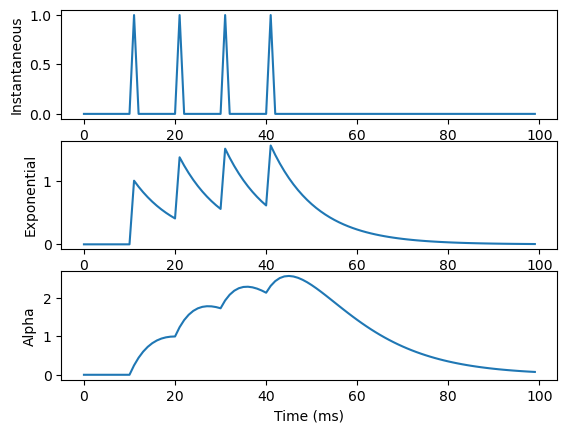

In [30]:
plt.figure()

plt.subplot(311)
plt.plot(data['g_a'][:, 0])
plt.ylabel("Instantaneous")

plt.subplot(312)
plt.plot(data['g_b'][:, 0])
plt.ylabel("Exponential")

plt.subplot(313)
plt.plot(data['alpha_c'][:, 0])
plt.xlabel("Time (ms)")
plt.ylabel("Alpha")

plt.show()

**Experiments:**

1. Modify the `SpikeSourceArray` object so that the neurons receives several spikes in a row (e.g. after 10, 20, 30, 40 ms, etc). What is the impact of the type of synaptic transmission 